In [8]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [9]:
def preprocess(penguin_df):
    ''' 
    split each feature on every midpoint between every two points
    return dataframe of binary features
    '''

    # initialize binary feature df the species target variable
    binary_feature_df = pd.DataFrame(penguin_df['Species'])
    feature_list = penguin_df.columns.to_list() # list of col names
    feature_list.remove('Species')
    
    for feature in feature_list:
        cl = penguin_df[f'{feature}']
        cl = cl.sort_values()
        cl = cl.drop_duplicates()
        cl = cl.tolist()
        for i in range(1, len(cl)):
            midpoint = (cl[i] + cl[i-1])/2
            # add new binary feature with split at midpoint 
            binary_feature_df[f'{feature}<={midpoint}'] = np.where(penguin_df[f'{feature}']<= midpoint, 1, 0)
    return binary_feature_df

In [10]:
import warnings
warnings.filterwarnings('ignore')
penguin_df = pd.read_csv("penguins_trunc.csv")
max = penguin_df.max()
min = penguin_df.min()

# preprocess data
binary_df = preprocess(penguin_df)
print("Binary Feature DataFrame:")
print("First 3 feature columns")
print(binary_df.iloc[:5, 1:4]) 
print("Last 3 feature columns")
print(binary_df.iloc[:5, -3:])


Binary Feature DataFrame:
First 3 feature columns
   CulmenLength<=32.6  CulmenLength<=33.3  CulmenLength<=33.75
0                   0                   0                    0
1                   0                   0                    0
2                   0                   0                    0
3                   0                   0                    0
4                   0                   0                    0
Last 3 feature columns
   FlipperLength<=228.5  FlipperLength<=229.5  FlipperLength<=230.5
0                     1                     1                     1
1                     1                     1                     1
2                     1                     1                     1
3                     1                     1                     1
4                     1                     1                     1


In [11]:

y = binary_df[['Species']]
X = binary_df.drop(columns=['Species'])
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# initialize logisitic regression with l2 penalty and liblinear solver
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train, y_train) # train model
feature_coef_df = pd.DataFrame({'coef':lr.coef_[0], 'feature_names':X_train.columns})
print("Binary Features with Respective coefficients")
print(feature_coef_df)




Binary Features with Respective coefficients
     coef         feature_names
0     0.0    CulmenLength<=32.6
1     0.0    CulmenLength<=33.3
2     0.0   CulmenLength<=33.75
3     0.0   CulmenLength<=34.05
4     0.0   CulmenLength<=34.25
..    ...                   ...
291   0.0  FlipperLength<=225.5
292   0.0  FlipperLength<=227.0
293   0.0  FlipperLength<=228.5
294   0.0  FlipperLength<=229.5
295   0.0  FlipperLength<=230.5

[296 rows x 2 columns]


In [15]:
training_accuracy = lr.score(X_train, y_train)
print("training accuracy:", training_accuracy)
testing_accuracy = lr.score(X_test, y_test)
print("testing accuracy:", testing_accuracy)


training accuracy: 0.9963369963369964
testing accuracy: 0.9565217391304348


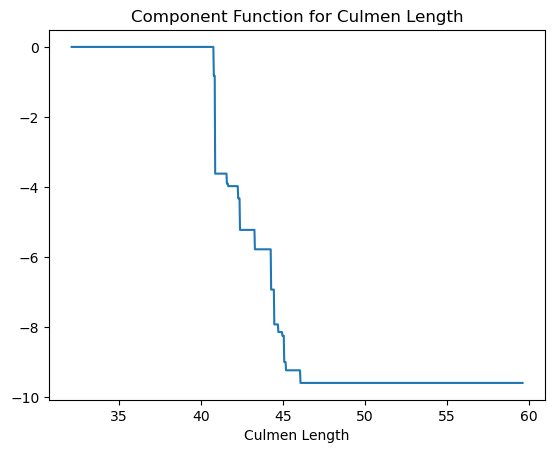

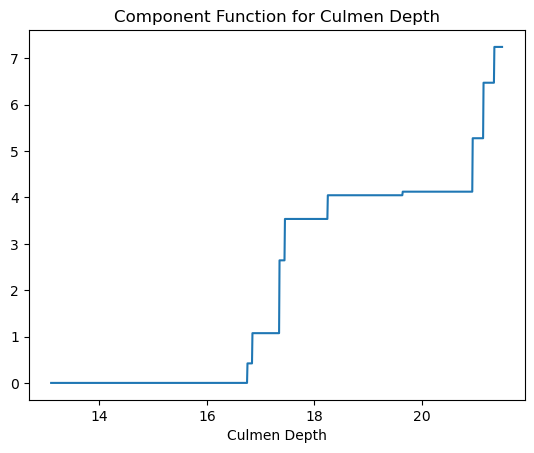

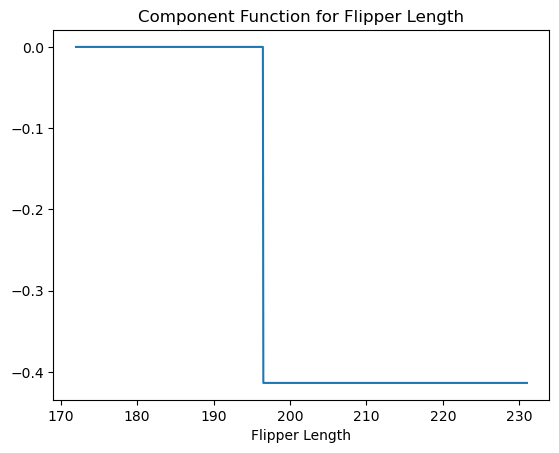

In [16]:

num_plot_points = 1000
culmenD_y = np.zeros(num_plot_points)
culmenL_y = np.zeros(num_plot_points)
flipperL_y = np.zeros(num_plot_points)

# create x axis range for feature using min, max and number of points
culmenD_x = np.linspace(min['CulmenDepth'], max['CulmenDepth'], num_plot_points) 
culmenL_x = np.linspace(min['CulmenLength'], max['CulmenLength'], num_plot_points)
flipperL_x = np.linspace(min['FlipperLength'], max['FlipperLength'], num_plot_points)

# iterate over coefficients 
for index, row in feature_coef_df.iterrows(): 
    temp_arr = np.zeros(num_plot_points)
    # check if coef not 0 and binary feature is split on culmen length
    if (row['feature_names'][:12] == 'CulmenLength') and (not row['coef'] == 0):
        for i in range(len(culmenL_x)): # iter over range of values in culmen length
            if culmenL_x[i] > float(row['feature_names'][14:]):
                temp_arr[i] = 1*row['coef']
        # update y values for all points in range
        culmenL_y = culmenL_y + temp_arr 
        pass
    # check if coef not 0 and binary feature is split on culmen Depth
    elif (row['feature_names'][:11] == 'CulmenDepth') and (not row['coef'] == 0):
        for i in range(len(culmenD_x)): # iter over range of values in culmen depth
            if culmenD_x[i] > float(row['feature_names'][13:]):
                temp_arr[i] = 1*row['coef']
        # update y values for all points in range
        culmenD_y = culmenD_y + temp_arr
        pass
    # check if coef not 0 and binary feature is split on flipper length
    elif (row['feature_names'][:13] == 'FlipperLength') and (not row['coef'] == 0):
        for i in range(len(flipperL_x)): # iter over range of values in flipper length
            if flipperL_x[i] > float(row['feature_names'][15:]):
                temp_arr[i] = 1*row['coef']
        # update y values for all points in range
        flipperL_y = flipperL_y + temp_arr
        pass

culmenL_df = pd.DataFrame({'x':culmenL_x, 'y':culmenL_y})
culmenD_df = pd.DataFrame({'x':culmenD_x, 'y':culmenD_y})
flipperL_df = pd.DataFrame({'x':flipperL_x, 'y':flipperL_y})

plt.plot('x', 'y', data=culmenL_df, linestyle='-')
plt.xlabel("Culmen Length") 
plt.title('Component Function for Culmen Length')
plt.show()
plt.plot('x', 'y', data=culmenD_df, linestyle='-') 
plt.xlabel("Culmen Depth") 
plt.title('Component Function for Culmen Depth')
plt.show()
plt.plot('x', 'y', data=flipperL_df, linestyle='-') 
plt.xlabel("Flipper Length") 
plt.title('Component Function for Flipper Length')
plt.show()